In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def F1(x):
    return x[0]

def wrap_F2(a,b):
    def F2(x):
        return 1 - x[0] - a * np.sin(b * np.pi * x[0]) + x[1]**2 
    return F2



In [3]:
def dominates(f1,f2):
    return np.all(f1<=f2) and np.any(f1<f2)


def ParetoFrontRanks_Goldberg(list_fs):
    list_fs=np.array(list_fs)
    pareto_front = list()
    ranks={}
    point_dominates={}
    point_is_dominated_by={}

    for idi, _ in enumerate(list_fs):
        ranks[idi] = np.inf
        point_dominates[idi] = list()
        point_is_dominated_by[idi] = 0
    
    for id1, obj1 in enumerate(list_fs):
        for index2, obj2 in enumerate(list_fs[id1 + 1:]):  # Avoid redundant comparisons
            id2 = index2 + id1 + 1
            if dominates(obj1,obj2):
                point_dominates[id1].append(id2)
                point_is_dominated_by[id2]+=1
            elif dominates(obj2,obj1):
                point_dominates[id2].append(id1)
                point_is_dominated_by[id1]+=1

        if point_is_dominated_by[id1]==0:
            ranks[id1] = 1
            pareto_front.append(id1)
            
    i = 1
        
    while pareto_front:
        next_pareto_front = list()

        for id1 in pareto_front:
            for id2 in point_dominates[id1]:
                point_is_dominated_by[id2]-=1

                if point_is_dominated_by[id2] == 0:
                    ranks[id2] = i + 1
                    next_pareto_front.append(id2)

        i += 1

        pareto_front = next_pareto_front
            
    return ranks


def ParetoFrontRanks_FonsecaFleming(list_fs):
    list_fs=np.array(list_fs)
    ranks={}
    point_is_dominated_by={}

    for idi, _ in enumerate(list_fs):
        ranks[idi] = np.inf
        point_is_dominated_by[idi] = list()
    
    for id1, obj1 in enumerate(list_fs):
        for index2, obj2 in enumerate(list_fs[id1 + 1:]):  # Avoid redundant comparisons
            id2 = index2 + id1 + 1
            if dominates(obj1,obj2):
                point_is_dominated_by[id2].append(id1)
            elif dominates(obj2,obj1):
                point_is_dominated_by[id1].append(id2)
                
        ranks[id1]=len(point_is_dominated_by[id1])+1
            
    return ranks








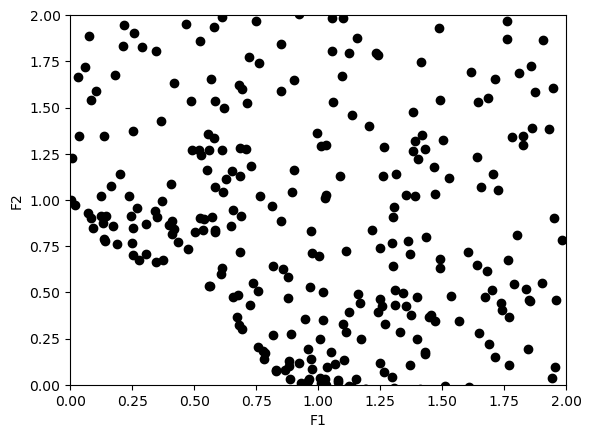

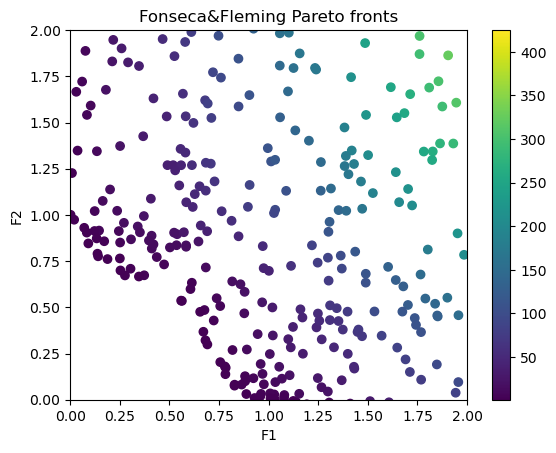

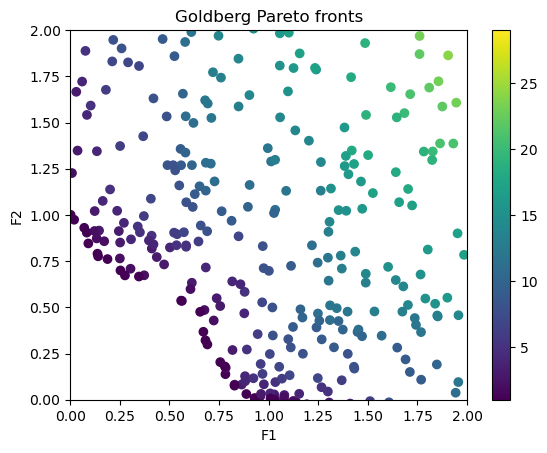

In [5]:
####
## non-convex case
####
a=0.1
b=3


## initialize the second objective function
F2=wrap_F2(a,b)

## generate n random solutions in [0,2]x[0,2]
n=500
np.random.seed(seed=3)
x = np.random.rand(n, 2)
x = 2*x 


plt.scatter([F1(xi) for xi in x],[F2(xi) for xi in x],color='k')
plt.xlabel('F1')
plt.xlim([0,2])
plt.ylabel('F2')
plt.ylim([0,2])
plt.show()


ranks=ParetoFrontRanks_FonsecaFleming([[F1(xi),F2(xi)] for xi in x])
color_list=list(ranks.values())
plt.scatter([F1(xi) for xi in x],[F2(xi) for xi in x],c=color_list)
plt.colorbar()
plt.xlabel('F1')
plt.xlim([0,2])
plt.ylabel('F2')
plt.ylim([0,2])
plt.title('Fonseca&Fleming Pareto fronts')
plt.show()


ranks=ParetoFrontRanks_Goldberg([[F1(xi),F2(xi)] for xi in x])
color_list=list(ranks.values())
plt.scatter([F1(xi) for xi in x],[F2(xi) for xi in x],c=color_list)
plt.colorbar()
plt.xlabel('F1')
plt.xlim([0,2])
plt.ylabel('F2')
plt.ylim([0,2])
plt.title('Goldberg Pareto fronts')
plt.show()


